<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

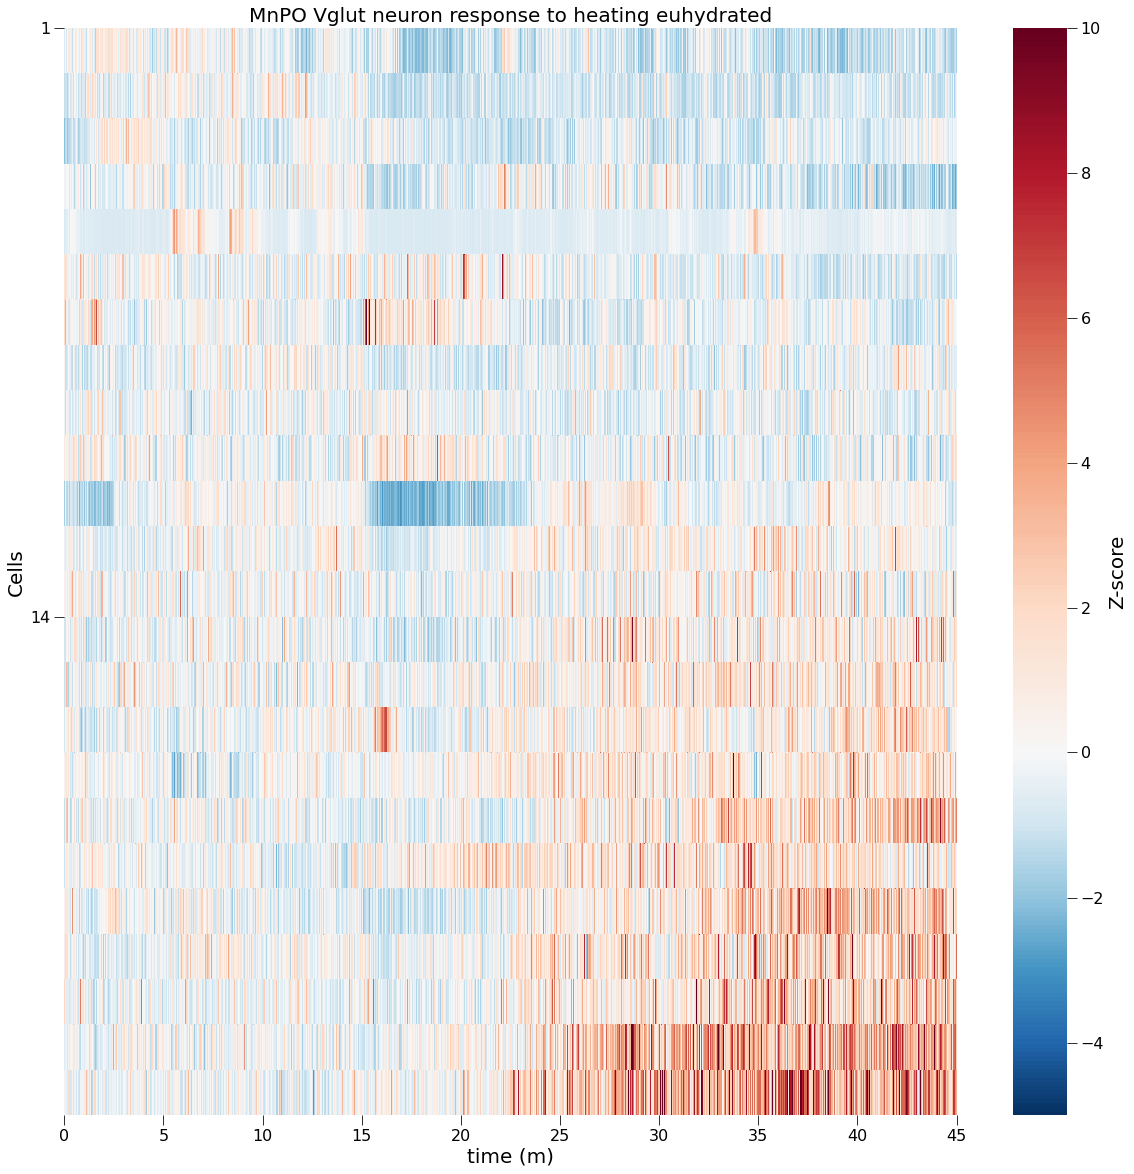

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import DivergingNorm
import matplotlib.colors as colors
import numpy as np
import pickle

with open('NaCl_VGDTR_sorted.p', 'rb') as f:
    test = pickle.load(f)

'''
The dataframes in the pickle file correspond to

0:S_df, 1:dff_df, 2:dff_i, 3:dff_nc, 4:dff_a, 5:i, 6:nc, 7:a

You care about 0, which is your sorted dataframe, 5 which is inhibitory cluster, 6 is no change clust, and 7 which is activated cluster
'''    

##rename your variables for easier organization
NaCl_VGDTR1_dict=({'sorted_df':test[0],'i': test[5], 'nc': test[6], 'act': test[7] })
df=NaCl_VGDTR1_dict['sorted_df'].T


#input parameters for scaling colours
vmin= df.min().min()
vcenter=0
vmax=10

class dataframe():
    def __init__(self, df_name, stim, condition, cell_number, time):
        self.df_name=df_name
        self.stim=stim
        self.condition=condition
        self.cell_number=cell_number
        self.time=time
    
    def graph_heatmap(self):
        divnorm=colors.TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
        ax=sns.heatmap(self.df_name,
                       cmap="RdBu_r",
                       norm=divnorm,
                       robust=True,
                       vmin=-5,
                       vmax=10,
                       xticklabels=1500,
                       cbar_kws={'label': 'Z-score'})
        plt.rc_context({'figure.figsize':(20,20),
                        'ytick.labelsize':16,
                        'xtick.labelsize':16,
                        'xtick.major.size':10,
                        'ytick.major.size':10,
                        'axes.labelsize':20})
        ax.set_title('MnPO Vglut neuron response to ' + str(self.stim) +' ' + str(self.condition), fontsize=20)
        ax.set_xlabel('time (m)')
        ax.set_ylabel('Cells')           
        plt.yticks([0,(self.cell_number-1)])
        ax.set_yticklabels([1,self.cell_number], rotation=1)
        ax.set_xticklabels(np.arange(0, self.time,5))
        return plt.plot



VGLUTDTRM1=dataframe(df.T, 'heating', 'euhydrated', 14, 50)
VGLUTDTRM1.graph_heatmap()